# Classification (supervised learning)

The notebook aims to study and implement classification (supervised learning) using "sklearn". The iris dataset will be used to classify.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [1]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [3]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [6]:
# Print dataset
print(dataset)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Flower
0             5.1          3.5           1.4          0.2       0
1             4.9          3.0           1.4          0.2       0
2             4.7          3.2           1.3          0.2       0
3             4.6          3.1           1.5          0.2       0
4             5.0          3.6           1.4          0.2       0
..            ...          ...           ...          ...     ...
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       2
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       2

[150 rows x 5 columns]


In [7]:
# Print dataset shape
print(dataset.shape)


(150, 5)


In [8]:
# Print column names
print(dataset.columns)


Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')


2. Drop rows with any missing values


In [13]:
# Drop na
dataset_drop = dataset.dropna()
print(dataset_drop)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Flower
0             5.1          3.5           1.4          0.2       0
1             4.9          3.0           1.4          0.2       0
2             4.7          3.2           1.3          0.2       0
3             4.6          3.1           1.5          0.2       0
4             5.0          3.6           1.4          0.2       0
..            ...          ...           ...          ...     ...
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       2
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       2

[150 rows x 5 columns]


3. Encoding the class label categorical column: from string to num


In [4]:
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
dataset = dataset.replace({"Flower": {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}})

#Visualize the dataset
dataset

<ipython-input-4-cbc884162777>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({"Flower": {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}})


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now the label/category is numeric


4. Discard columns that won't be used


In [15]:
# Drop out non necesary columns
#dataset_filtered = dataset.drop(columns=['Flower'])
#print(dataset_filtered.head())


5. Scatter plot of the data

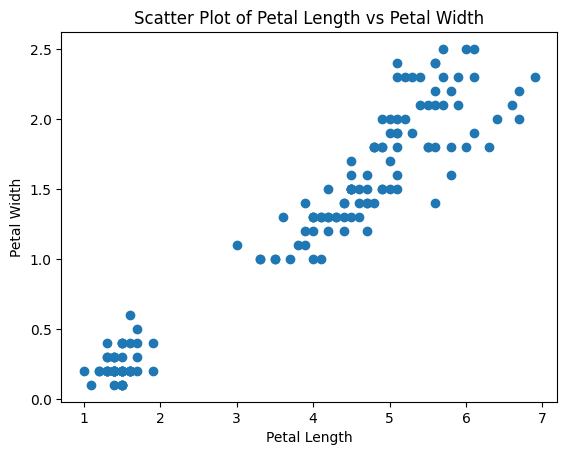

In [16]:
# Scatter plot of Petal_Length vs Petal_Width
plt.scatter(dataset['Petal_Length'], dataset['Petal_Width'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter Plot of Petal Length vs Petal Width')
plt.show()


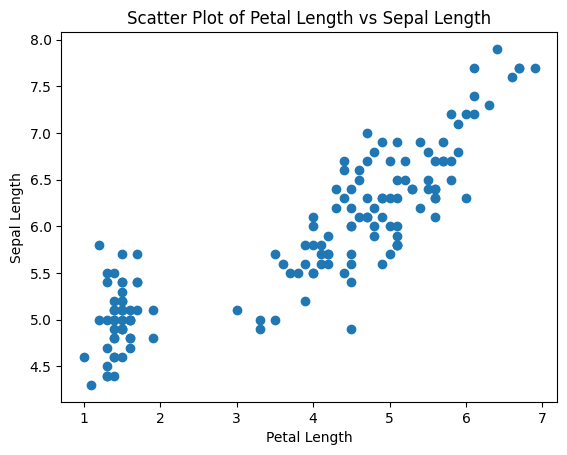

In [17]:
# Scatter plot of Petal_Length vs Sepal_Length
plt.scatter(dataset['Petal_Length'], dataset['Sepal_Length'])
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.title('Scatter Plot of Petal Length vs Sepal Length')
plt.show()

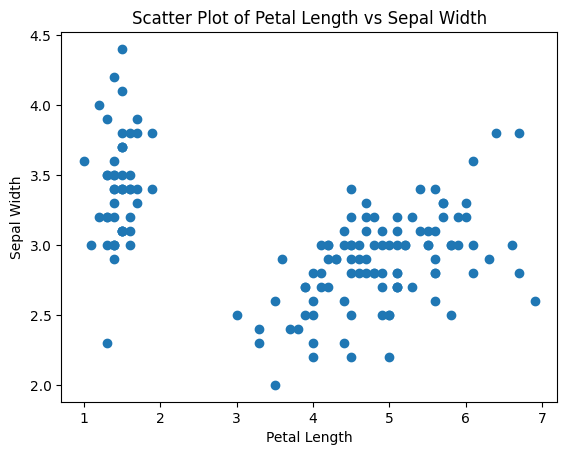

In [18]:
# Scatter plot of Petal_Length vs Sepal_Width
plt.scatter(dataset['Petal_Length'], dataset['Sepal_Width'])
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot of Petal Length vs Sepal Width')
plt.show()

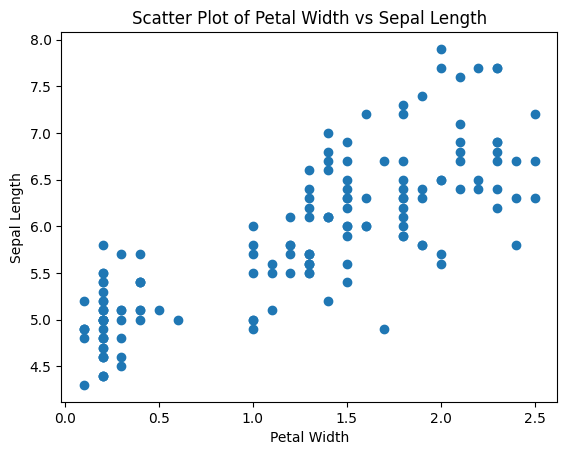

In [19]:
# Scatter plot of Petal_Width vs Sepal_Length
plt.scatter(dataset['Petal_Width'], dataset['Sepal_Length'])
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.title('Scatter Plot of Petal Width vs Sepal Length')
plt.show()

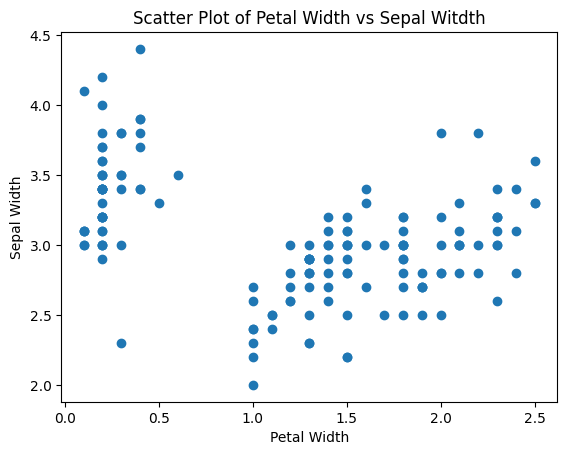

In [20]:
# Scatter plot of Petal_Width vs Sepal_Width
plt.scatter(dataset['Petal_Width'], dataset['Sepal_Width'])
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot of Petal Width vs Sepal Witdth')
plt.show()



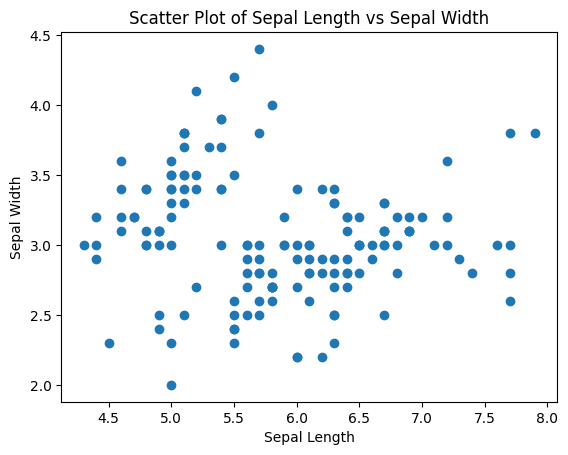

In [21]:
# Scatter plot of Sepal_Length vs Sepal_Width
plt.scatter(dataset['Sepal_Length'], dataset['Sepal_Width'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.show()



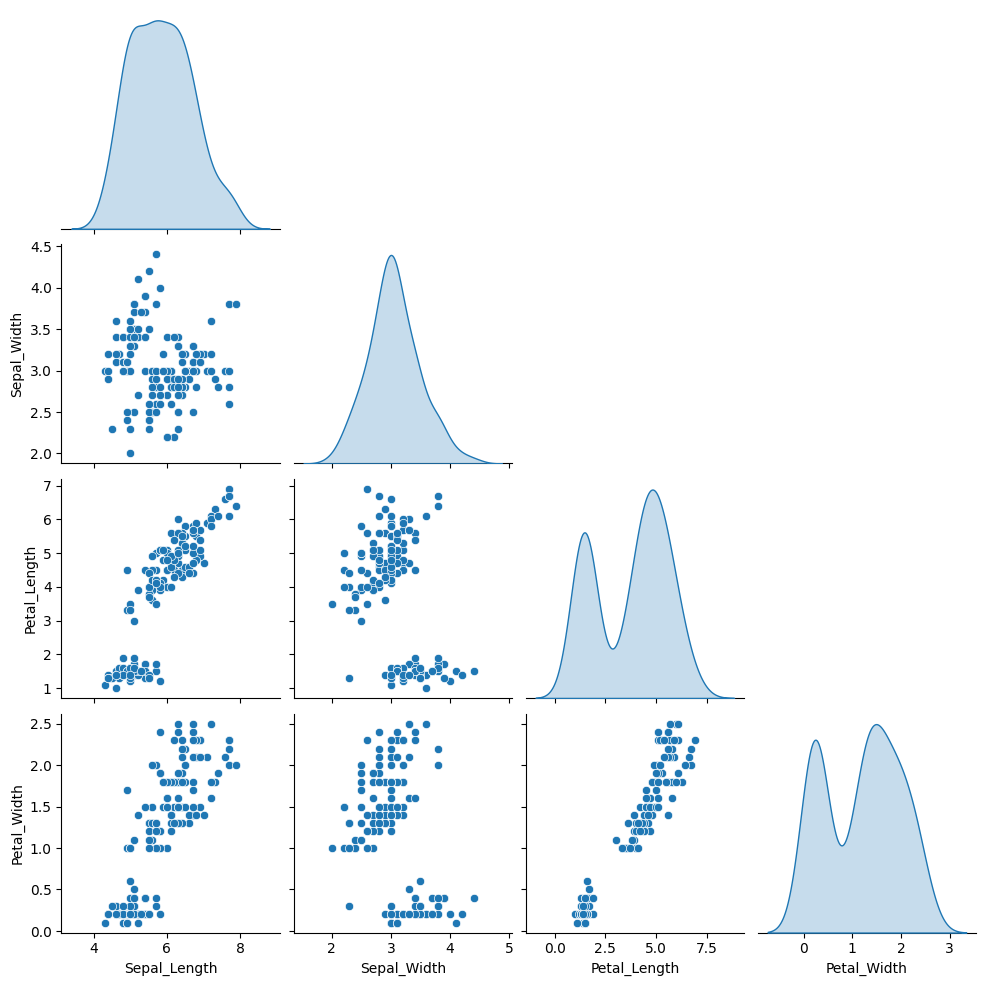

In [26]:
# Pairplot: Scatterplot of all variables (not the flower type)
g1 = sns.pairplot(dataset[['Sepal_Length', 'Sepal_Width',
                           'Petal_Length', 'Petal_Width']],
                  corner=True, diag_kind='kde')
plt.show()


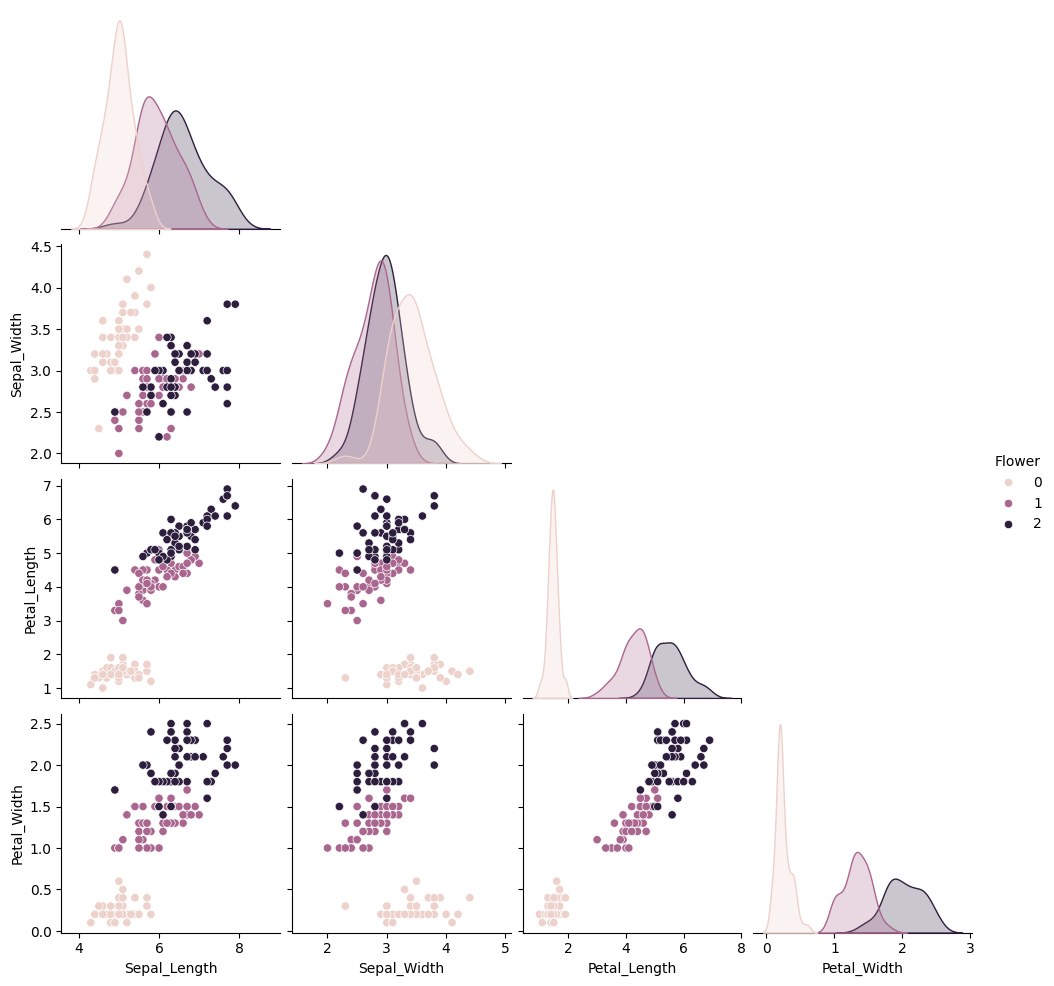

In [31]:
# Pairplot: Scatterplot of all variables (not the flower type)
g2 = sns.pairplot(dataset[['Sepal_Length', 'Sepal_Width',
                           'Petal_Length', 'Petal_Width', 'Flower']], hue='Flower',
                  corner=True, diag_kind='kde')
plt.show()


6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [33]:
# Get dataframes for each real cluster
clusters = dataset['Flower'].unique()  # Obtener las especies únicas
df_clusters = {flower: dataset[dataset['Flower'] == flower] for flower in clusters}  # Crear dataframes por cluster

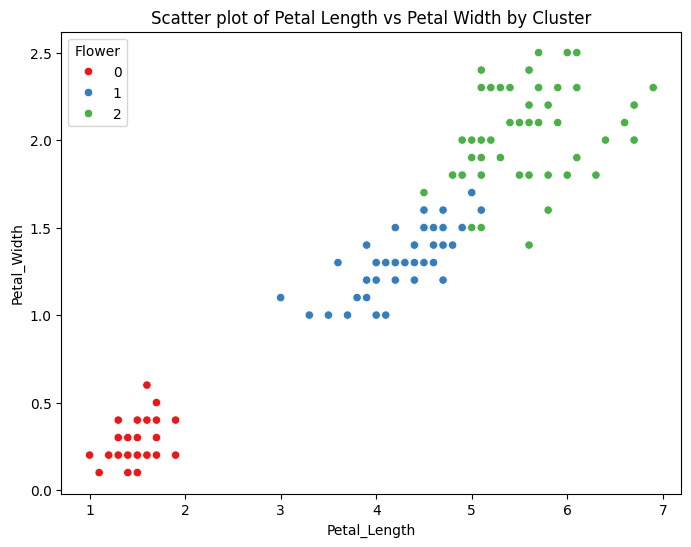

In [34]:
# Scatter plot of each real cluster for Petal
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataset, x='Petal_Length', y='Petal_Width', hue='Flower', palette='Set1')
plt.title('Scatter plot of Petal Length vs Petal Width by Cluster')
plt.show()


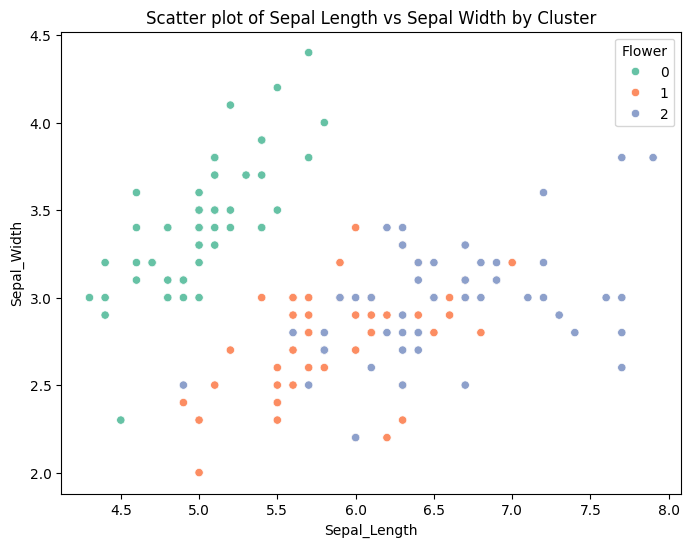

In [35]:
# Scatter plot of each real cluster for Sepal
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataset, x='Sepal_Length', y='Sepal_Width', hue='Flower', palette='Set2')
plt.title('Scatter plot of Sepal Length vs Sepal Width by Cluster')
plt.show()


Recall that for this dataset we know in advance the class to which each point belongs to

# Get variables **X** and labels **y**

In [36]:
# Select variables (one, two, three, four)
X  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
#X  = dataset[["Petal_Length", "Petal_Width"]].values
#X  = dataset[["Sepal_Length", "Sepal_Width"]].values

# Get the class of each observation
y  = dataset["Flower"].values


In [38]:
# Understand the data X
print("X:", X.shape)
print("Primeras 5 filas de X:\n", X[:5])

X: (150, 4)
Primeras 5 filas de X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [39]:
# Understand the data y
print("Y:", y.shape)
print("Clases unicas in y:", set(y))  # Mostrar las clases únicas

Y: (150,)
Clases unicas in y: {np.int64(0), np.int64(1), np.int64(2)}


In [40]:
# Calculate the number of observations in the dataset
print("Numero de Observaciones:", len(y))

Total number of observations: 150


In [41]:
# Calculate the number of observations for class 0
unique, counts = np.unique(y, return_counts=True)
for flower, count in zip(unique, counts):
    print(f"Numero de observaciones para {flower}: {count}")

Numero de observaciones para 0: 50
Numero de observaciones para 1: 50
Numero de observaciones para 2: 50


In [ ]:
# Calculate the number of observations for class 1
#Estan juntas las clases


In [ ]:
# Calculate the number of observations for class 2
#Estan juntas las clases


# Train a classifier

## Train the classification model

In [42]:
# Import sklearn linear_model

from sklearn.linear_model import LogisticRegression

# Inicializar el clasificador
model = LogisticRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X, y)




LogisticRegression()

## Predict the class of a new observation

In [43]:
# Get a new observation
xnew = np.array([[5.5, 3.5, 1.5, 0.5]])
#xnew = np.array([[5.5, 2.5, 3.5, 1.5]])
#xnew = np.array([[6.5, 3.5, 5.5, 2.5]])

# Print the new observation
xnew


array([[5.5, 3.5, 1.5, 0.5]])

In [44]:
# Make the prediction using xnew
y_pred = model.predict(xnew)

# Get the predicted class
print("Predicted class:", y_pred[0])


Predicted class: 0


The question is, how accurate is the classification model?... we need to evaluate the performance of our classifier

# Evaluation of a classifier

## Split data in train and test sets

Holdout: spliting the dataset in train and test sets

In [45]:
# Import sklearn train_test_sp
from sklearn.model_selection import train_test_split
# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [46]:
# Number of observations in the train set
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Train set size: 120
Test set size: 30


In [47]:
# Number of observations of each class in the train set
unique, counts = np.unique(y_train, return_counts=True)
print("Observations per class in train set:", dict(zip(unique, counts)))

Observations per class in train set: {np.int64(0): np.int64(40), np.int64(1): np.int64(40), np.int64(2): np.int64(40)}


In [48]:
# Number of observations in the test set
unique, counts = np.unique(y_test, return_counts=True)
print("Observations per class in test set:", dict(zip(unique, counts)))


Observations per class in test set: {np.int64(0): np.int64(10), np.int64(1): np.int64(10), np.int64(2): np.int64(10)}


In [49]:
# Number of observations of each class in the test set
unique, counts = np.unique(y_test, return_counts=True)
print("Observations per class in test set:", dict(zip(unique, counts)))


Observations per class in test set: {np.int64(0): np.int64(10), np.int64(1): np.int64(10), np.int64(2): np.int64(10)}


## Train the classification model

In [50]:
# Initialize the classifier
model = LogisticRegression(max_iter=200)
# Fit the model to the training data
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

## Test the classification model

In [51]:
# Make the predictions using the test set
y_pred = model.predict(X_test)


In [52]:
# Explore real and predicted labels
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_results.head())

   Actual  Predicted
0       0          0
1       2          2
2       1          1
3       1          1
4       0          0


## Compute the acurracy

In [53]:
# Define a function to compute accuracy
from sklearn.metrics import accuracy_score
def compute_accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)


In [54]:
# Calculate total accuracy
total_accuracy = compute_accuracy(y_test, y_pred)
print("Total Accuracy:", total_accuracy)


Total Accuracy: 0.9666666666666667


In [55]:
classes = np.unique(y_test)

# Calcular la precisión para cada clase
for class_label in classes:
    mask = y_test == class_label  # Filtrar por clase
    class_accuracy = compute_accuracy(y_test[mask], y_pred[mask])
    print(f"Accuracy for class {class_label}: {class_accuracy}")


Accuracy for class 0: 1.0
Accuracy for class 1: 0.9
Accuracy for class 2: 1.0


In [ ]:
# Compute accuracy for class 0
#Ya esta junto con las otras


In [ ]:
# Compute accuracy for class 1
#Ya esta junto con las otras


In [ ]:
# Compute accuracy for class 2
#Ya esta junto con las otras


## Confussion matrix

In [56]:
# Compute confussion matrix (normalized confusion matrix)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#Normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:\n", cm_normalized)

Normalized Confusion Matrix:
 [[1.  0.  0. ]
 [0.  0.9 0.1]
 [0.  0.  1. ]]


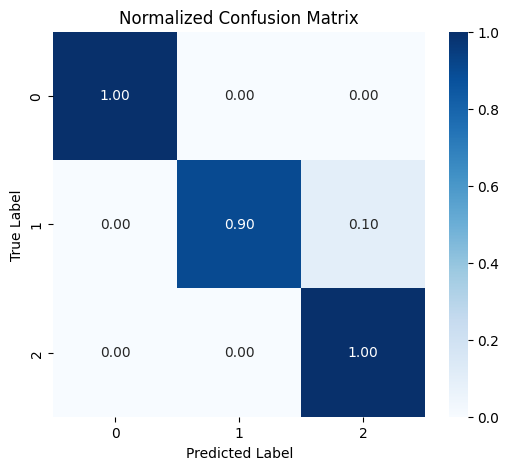

In [57]:
# Plot normalized confussion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_normalized, annot=True, cmap="Blues", fmt=".2f", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix")
plt.show()


# Final remarks

- Evaluation of classification model is critical

- Train and test set have to be mutually exclusive

- There are several alternatives: Holdout, Montecarlo, k-fold, repeated k-fold, Leave P Out (LPO), Leave One Out (LOO), Stratified k-fold

- https://scikit-learn.org/stable/modules/cross_validation.html

# Activity

1) Compare the accuracy of the classification using (a) the four variables, (b) the two Petal variables, and (c) the two Sepal variables. Which provides the best classification accuracy?


2) Using the four variables, try with two classifiers. Which provides the best performance?

In [58]:
X_all = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]]
X_petal = dataset[["Petal_Length", "Petal_Width"]]
X_sepal = dataset[["Sepal_Length", "Sepal_Width"]]
y = dataset["Flower"]

# Dividir en conjunto de entrenamiento y prueba
X_train_all, X_test_all, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)
X_train_petal, X_test_petal, _, _ = train_test_split(X_petal, y, test_size=0.2, random_state=42)
X_train_sepal, X_test_sepal, _, _ = train_test_split(X_sepal, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)

# Entrenar el modelo
model.fit(X_train_all, y_train)
y_pred_all = model.predict(X_test_all)
accuracy_all = accuracy_score(y_test, y_pred_all)

# Entrenar y evaluar el modelo con variables del pétalo
model.fit(X_train_petal, y_train)
y_pred_petal = model.predict(X_test_petal)
accuracy_petal = accuracy_score(y_test, y_pred_petal)

model.fit(X_train_sepal, y_train)
y_pred_sepal = model.predict(X_test_sepal)
accuracy_sepal = accuracy_score(y_test, y_pred_sepal)

print(f"Accuracy with all variables: {accuracy_all:.2f}")
print(f"Accuracy with Petal variables: {accuracy_petal:.2f}")
print(f"Accuracy with Sepal variables: {accuracy_sepal:.2f}")

Accuracy with all variables: 1.00
Accuracy with Petal variables: 1.00
Accuracy with Sepal variables: 0.90


In [59]:
from sklearn.svm import SVC

# Inicializar modelos
model_logreg = LogisticRegression(max_iter=200)
model_svm = SVC(kernel='linear')

# Entrenar y evaluar el modelo de Regresión Logística
model_logreg.fit(X_train_all, y_train)
y_pred_logreg = model_logreg.predict(X_test_all)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Entrenar y evaluar el modelo SVM
model_svm.fit(X_train_all, y_train)
y_pred_svm = model_svm.predict(X_test_all)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Accuracy with Logistic Regression: {accuracy_logreg:.2f}")
print(f"Accuracy with SVM: {accuracy_svm:.2f}")

Accuracy with Logistic Regression: 1.00
Accuracy with SVM: 1.00


El SVM ofrece un mejor rendimiento en el manejo de estos datos pero la regresion logistica tambien puede ser efectiva en muchos casos. En resumen, si buscamos la mejor precisión en la clasificación, debemos utilizar todas las variables con un modelo SVM. Si queremos un modelo más rápido y fácil de interpretar, la Regresión Logística sigue siendo una opción confiable.